In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA

dataset = load_breast_cancer()

In [38]:
X = dataset.data
y = dataset.target

In [39]:
def pca_custom(data, N):
    normalized_data = data - data.mean(axis=0)
    covariance_matrix = np.cov(normalized_data, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    selected_eigenvectors = sorted_eigenvectors[:, :N]
    reduced_data = np.dot(normalized_data, selected_eigenvectors)
    return reduced_data

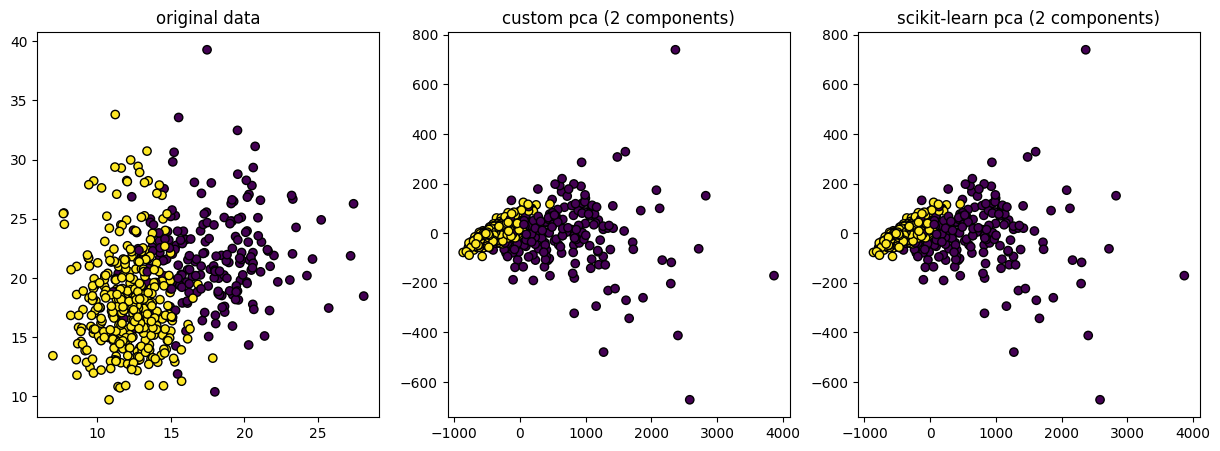

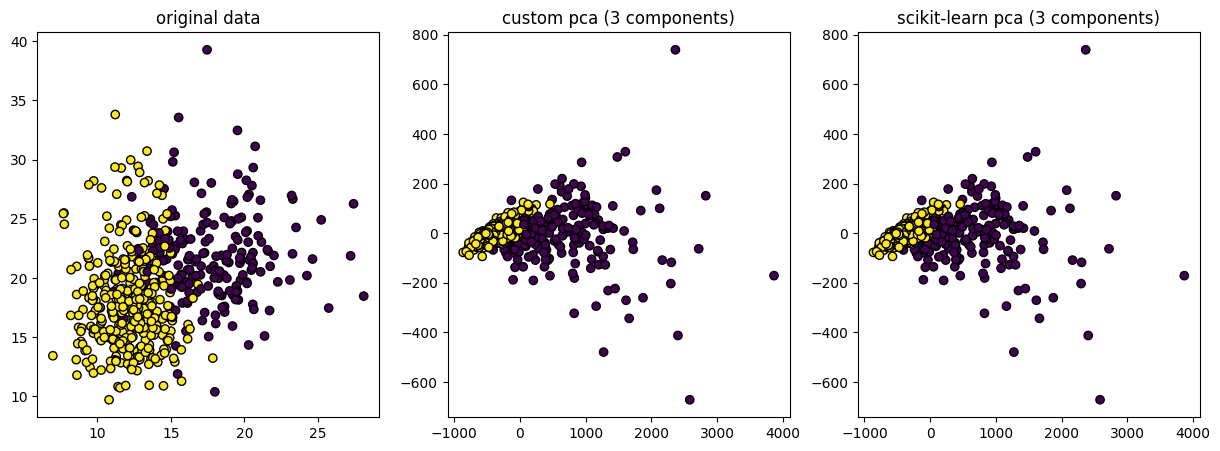

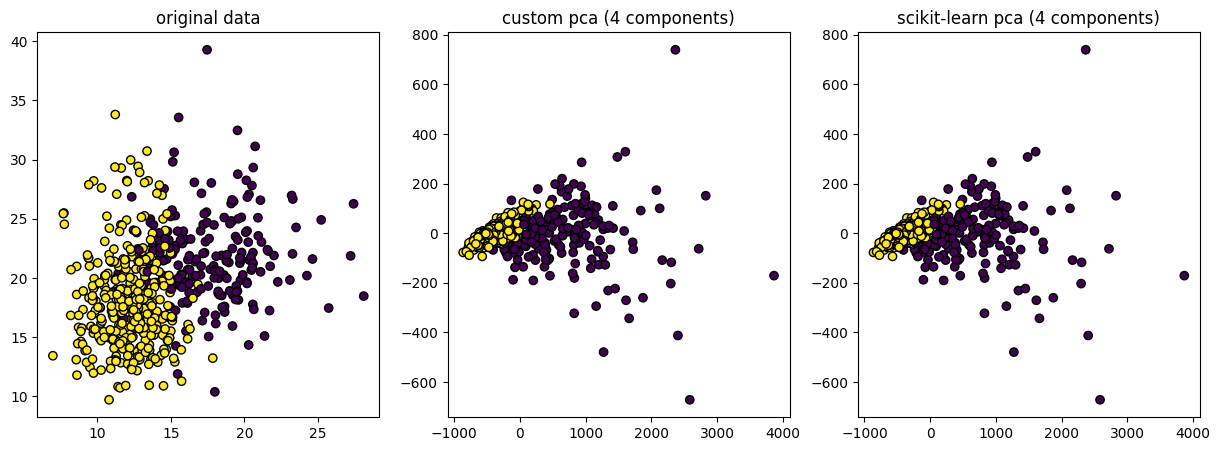

In [40]:
for components in [2, 3, 4]:
    reduced_data = pca_custom(X, components)
    pca = PCA(components)
    reduced_data_sklearn = pca.fit_transform(X)
    
    plt.figure(figsize=(15, 5))
    plt.subplot(131)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k")
    plt.title('original data')
    plt.subplot(132)
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=y, edgecolors="k")
    plt.title(f'custom pca ({components} components)')
    plt.subplot(133)
    plt.scatter(reduced_data_sklearn[:, 0], reduced_data_sklearn[:, 1], c=y, edgecolors="k")
    plt.title(f'scikit-learn pca ({components} components)')
    plt.show()